In [ ]:
# for colab link

In [ ]:
#  mounting drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Customer Churn Prediction Model

# _Customer Churn Prediction Modelling_

## _TABLE OF CONTENTS_
* __1.0 OVERVIEW__
* 1.1 Dataset Description
* __2.0 DATA PREPARATION__
* 2.1 Duplicate Check
* 2.2 Missing Value Check
* 2.3 Checking for Missing Value Placeholder
* __3.0 DESCRIPTION OF CATEGORICAL DATA__

In [157]:
!pip install --quiet optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.9 MB/s eta 0:00:00


In [160]:
!pip install --quiet pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━

In [173]:
#  Importing libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from pycaret.classification import *
import optuna


from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score




## 1. 0 Overview
The telecom or telecommunications industry is rapidly evolving and is among the fastest-growing industries. With the rising competition, it is more crucial than ever for telecom companies to retain their customers. Predicting customer churn, which is the probability of a customer leaving a company, has become a critical task for telecom companies.

The Telco Churn Prediction dataset provided by IBM includes a sample of customer data with attributes such as customer services, account information, and demographics. The dataset also features a binary label indicating whether the customer has churned or not. The dataset's objective is to predict whether a customer is likely to churn based on their subscribed services and profile.

By analyzing customer data and developing retention strategies, telecom companies can retain their customers and attract new ones from their competitors. In this regard, machine learning models can be used to predict churn and identify the most significant features that contribute to customer churn. This can aid telecom companies in developing targeted customer retention programs and enhancing their business performance.

Algorithm used


In [59]:
#  Reading dataset into memory
filepath = '/content/gdrive/MyDrive/Telco Customer Churn/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv'
data0 = pd.read_csv(filepath)

pd.set_option('display.max_columns', None)
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [151]:
data0.shape

(7043, 21)

### 1.1 Dataset Description
The dataset for this project was sourced from [kaggle.com](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?datasetId=13996&language=Python). The dataset contains information 7043 instances (customers, in this case) across 20 different attributes ranging from customer ID to TotalCharges.

#### Definition of Attributes
    1) customerID : Customer ID

    2) gender : Whether the customer is a male or a female

    3) SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)

    4) Partner : Whether the customer has a partner or not (Yes, No)

    5) Dependents : Whether the customer has dependents or not (Yes, No)

    6) tenure : Number of months the customer has stayed with the company

    7) PhoneService : Whether the customer has a phone service or not (Yes, No)

    8) MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)

    9) InternetService : Customer’s internet service provider (DSL, Fiber optic, No)

    10) OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)

    11) OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)

    12) DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)

    13) TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)

    14) StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)

    15) StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)

    16) Contract : The contract term of the customer (Month-to-month, One year, Two year)

    17) PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)

    18) PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

    19) MonthlyCharges : The amount charged to the customer monthly

    20) TotalCharges : The total amount charged to the customer

    21) Churn : Whether the customer churned or not (Yes or No)

In [61]:
#  Displaying preview
data0.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [85]:
data1 = data0.copy()

## 2.0 Data Preparation
Data preparation took place in 3 steps;
    
    1) Duplicate check.
    2) Missing value check.
    3) Checking for missing value placeholders.
    
### 2.1 Duplicate Check

In [86]:
#  Checking dataset for duplicates
if data1.duplicated().sum() > 0:
    print(f'There are/is duplicates in this dataset\nNumber: {data1.duplicated().sum()}')
else:
    print('Dataset contains no duplicates')

Dataset contains no duplicates


### 2.2 Missing Value Check

In [87]:
#  Checking for missing values
if data1.isnull().sum().sum() > 0:
    print(f'There are/is {data1.isnull().sum().sum()} missing values in this dataset')
else:
    print('There are no missing values in this dataset')

There are no missing values in this dataset


# Data Cleaning

In [134]:
data2 = data1.copy()

data2 = data2.drop(['customerID'], axis=1)

In [135]:
data2.loc[data2['TotalCharges'] == ' ', 'TotalCharges'] = np.nan
data2['TotalCharges'] = data2['TotalCharges'].astype(float)
data2['TotalCharges'].fillna(data2['TotalCharges'].mean(), inplace=True)

# Label Encoder

In [136]:
data3 = data2.copy()

In [137]:
def label_encode_features(df):

    # Identify categorical columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Copy the input dataframe
    encoded_df = df.copy()

    # Encode categorical columns using LabelEncoder
    le = LabelEncoder()
    for col in cat_cols:
        encoded_df[col] = le.fit_transform(encoded_df[col])
        print(f'{col}: {len(encoded_df[col].unique())} unique value(s)')
        print(f'Unique values: {list(encoded_df[col].unique())}\n')

    return encoded_df


In [138]:
data3 = label_encode_features(data3)

gender: 2 unique value(s)
Unique values: [0, 1]

Partner: 2 unique value(s)
Unique values: [1, 0]

Dependents: 2 unique value(s)
Unique values: [0, 1]

PhoneService: 2 unique value(s)
Unique values: [0, 1]

MultipleLines: 3 unique value(s)
Unique values: [1, 0, 2]

InternetService: 3 unique value(s)
Unique values: [0, 1, 2]

OnlineSecurity: 3 unique value(s)
Unique values: [0, 2, 1]

OnlineBackup: 3 unique value(s)
Unique values: [2, 0, 1]

DeviceProtection: 3 unique value(s)
Unique values: [0, 2, 1]

TechSupport: 3 unique value(s)
Unique values: [0, 2, 1]

StreamingTV: 3 unique value(s)
Unique values: [0, 2, 1]

StreamingMovies: 3 unique value(s)
Unique values: [0, 2, 1]

Contract: 3 unique value(s)
Unique values: [0, 1, 2]

PaperlessBilling: 2 unique value(s)
Unique values: [1, 0]

PaymentMethod: 4 unique value(s)
Unique values: [2, 3, 0, 1]

Churn: 2 unique value(s)
Unique values: [0, 1]



Scalling

In [148]:
data4 = data3.copy()
scaler = MinMaxScaler()

# Scale the data
scaled_data = scaler.fit_transform(data4)
scaled_data

array([[0.        , 0.        , 1.        , ..., 0.11542289, 0.0012751 ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.38507463, 0.21586661,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.35422886, 0.01031041,
        1.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11293532, 0.03780868,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.55870647, 0.03321025,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.86965174, 0.78764136,
        0.        ]])

In [149]:
scaled_data.shape

(7043, 20)

Train Test Split

In [156]:
data5 = data4.copy()

X = data5.drop('Churn', axis=1)
y = data5['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (5282, 19), y_train shape: (5282,)
X_test shape: (1761, 19), y_test shape: (1761,)


Model Building

Using pycaret to find the best algorithm

,Description,Value
0,Session id,7830
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 20)"
4,Transformed data shape,"(7043, 20)"
5,Transformed train set shape,"(4930, 20)"
6,Transformed test set shape,"(2113, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8105,0.8502,0.5634,0.6706,0.6117,0.4878,0.4914,0.4050
lr,Logistic Regression,0.8069,0.8473,0.5604,0.6602,0.6057,0.4791,0.4822,0.4340
gbc,Gradient Boosting Classifier,0.8065,0.8511,0.5420,0.6656,0.5970,0.4716,0.4762,1.1000
ridge,Ridge Classifier,0.8055,0.0000,0.5168,0.6739,0.5845,0.4605,0.4677,0.0670
lda,Linear Discriminant Analysis,0.8006,0.8391,0.5505,0.6463,0.5942,0.4632,0.4660,0.1300
lightgbm,Light Gradient Boosting Machine,0.7963,0.8376,0.5420,0.6375,0.5855,0.4517,0.4546,0.2360
rf,Random Forest Classifier,0.7943,0.8295,0.5008,0.6444,0.5633,0.4316,0.4376,1.1700
xgboost,Extreme Gradient Boosting,0.7927,0.8261,0.5367,0.6289,0.5785,0.4423,0.4451,0.9030
et,Extra Trees Classifier,0.7866,0.8036,0.4870,0.6264,0.5472,0.4107,0.4167,0.9010
knn,K Neighbors Classifier,0.7680,0.7514,0.4518,0.5813,0.5081,0.3594,0.3645,0.1040


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8316,0.8661,0.6107,0.7143,0.6584,0.5476,0.5506
1,0.7951,0.8196,0.5344,0.6364,0.5809,0.4467,0.4497
2,0.8215,0.8897,0.6107,0.6838,0.6452,0.5264,0.5279
3,0.7870,0.8199,0.4962,0.6250,0.5532,0.4158,0.4206
4,0.8134,0.8208,0.5649,0.6789,0.6167,0.4947,0.4984
5,0.8134,0.8505,0.5649,0.6789,0.6167,0.4947,0.4984
6,0.8053,0.8702,0.5878,0.6471,0.6160,0.4860,0.4870
7,0.7992,0.8439,0.5725,0.6356,0.6024,0.4686,0.4697
8,0.8256,0.8651,0.5846,0.7037,0.6387,0.5250,0.5289


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

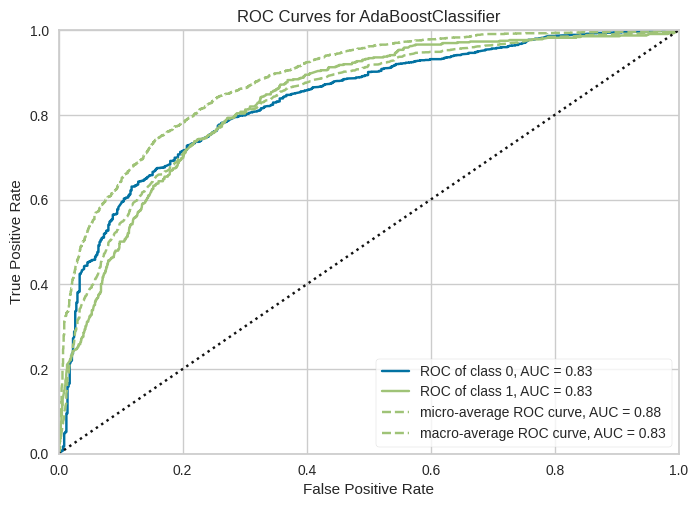

In [164]:
# Initialize the environment
setup(data4, target='Churn')

# Compare models
best_model = compare_models()

# Create a model
model = create_model(best_model)

# Evaluate the model
plot_model(model)

# Make predictions
#new_data = pd.read_csv('new_data.csv')
#predictions = predict_model(model, new_data)


HyperParemeter --- Tunning using Optuna

In [ ]:
# Define the objective function to optimize
def objective(trial):
    # Define the hyperparameters to optimize
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    learning_rate = trial.suggest_float('learning_rate', 0.1, 1.0)
    


    # Create a AdaBoostClassifier with the specified hyperparameters
    model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate = learning_rate, random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the accuracy score of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Return the accuracy score as the objective value
    return accuracy

# Create an Optuna study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the corresponding accuracy score
print(f'Best hyperparameters: {study.best_params}')
print(f'Best accuracy: {study.best_value}')


In [176]:
print(f'Best hyperparameters: {study.best_params}')
print(f'Best accuracy: {study.best_value}')

Best hyperparameters: {'n_estimators': 211, 'learning_rate': 0.9434598854481292}
Best accuracy: 0.8120386144236229


Re-Create model

In [178]:
# Create a AdaBoostClassifier with the specified hyperparameters
model = AdaBoostClassifier(n_estimators= 211, learning_rate = 0.9434598854481292, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Return the accuracy score as the objective value
accuracy



0.8120386144236229